# WeatherPy
----

## Observable Trends
# Northern/Southern Max Temp analysis
- Both the northern and southern plots show a steep temperature increase the closer the cities location are to the equator (0 on the latitude axis).
- The opposite temperatures are shown the further away from the equator the cities locations are.
# Northern/Southern Humidity analysis
- The Humidity % on both the northern and southern hemispheres are pretty spread out and hard to read from this data. I would bet a correlation could be found in longitudes instead of latitudes.
# Northern/Southern Cloudiness analysis
* Very similar to the Humidity % plots. You can practically see the longitude patterns in the visual data. This would make sense to have a correlation between clouds and humidity. However without further analysis into longitude I cannont confirm.
# Northern/Southern Cloudiness analysis
* The wind speed decreases the closer to the equator the cities locations are.

In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
import requests
import json
import random
from citipy import citipy
from config import api_key

## Generate Cities List

In [2]:
# random sets lat/lng
lat = np.random.uniform(low =- 90.000, high = 90.000, size = 2000)
lng = np.random.uniform(low =- 180.000, high = 180.000, size = 2000)
lat_lng = zip(lat, lng)

# for loop to the nearest city of random lat/lng and append to cities 
cities = []
for latlng in lat_lng:
    city = citipy.nearest_city(latlng[0], latlng[1]).city_name
    
    if city not in cities:
        cities.append(city)

len(cities)

753

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
# Build URL with open weather api
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={api_key}&units={units}&q="

# set up lists to hold reponse info
city_name = []
lat_list = []
lng_list = []
temp_list = []
humidity = []
cloudiness = []
wind_list = []
date = []
country = []


#set counters for f str
index_counter = 0
set_counter = 1


print("Beginning Data Retrieval ")
print("-----------------------------")

# For loop data retrieval and append lists
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        temp_list.append(response['main']['temp_max'])
        wind_list.append(response["wind"]["speed"])
        
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("~~~  oh no! City not found! ლ(ಠ益ಠლ)  ~~~")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : kapaa
Processing Record 2 of Set 1 : kruisfontein
Processing Record 3 of Set 1 : okha
Processing Record 4 of Set 1 : thompson
Processing Record 5 of Set 1 : ushuaia
~~~  oh no! City not found! ლ(ಠ益ಠლ)  ~~~
Processing Record 6 of Set 1 : punta arenas
~~~  oh no! City not found! ლ(ಠ益ಠლ)  ~~~
Processing Record 7 of Set 1 : cidreira
Processing Record 8 of Set 1 : khani
Processing Record 9 of Set 1 : tasiilaq
Processing Record 10 of Set 1 : puri
Processing Record 11 of Set 1 : abu kamal
~~~  oh no! City not found! ლ(ಠ益ಠლ)  ~~~
Processing Record 12 of Set 1 : bluff
Processing Record 13 of Set 1 : busselton
Processing Record 14 of Set 1 : portland
Processing Record 15 of Set 1 : chuy
Processing Record 16 of Set 1 : hanmer springs
Processing Record 17 of Set 1 : severo-kurilsk
Processing Record 18 of Set 1 : curumani
~~~  oh no! City not found! ლ(ಠ益ಠლ)  ~~~
Processing Record 19 of Set 1 : longyearbyen
Proces

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# create dataframe 
weather_df = pd.DataFrame({"City": city_name, "Lat": lat_list, "Lng": lng_list, 
                           "Max Temp": temp_list, "Humidity": humidity, "Cloudiness": cloudiness, 
                           "Wind Speed": wind_list, "Country": country, "Date": date})
# Display the DataFrame
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.08,-159.32,80.60,69,75,13.87,US,1600439033
1,Kruisfontein,-34.00,24.73,66.00,67,100,11.99,ZA,1600439034
2,Okha,53.57,142.95,51.69,92,100,27.31,RU,1600439034
3,Thompson,55.74,-97.86,30.20,100,75,2.37,CA,1600439034
4,Ushuaia,-54.80,-68.30,30.20,100,90,35.57,AR,1600439034


In [6]:
# Export the city data into a .csv.
weather_df.to_csv("cities.csv", index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [14]:
#  Get the indices of cities that have humidity over 100%.
max_humid = weather_df["Humidity"].max()
max_humid #Skip this step if there are no cities that have humidity > 100%. BOOYA!

100

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

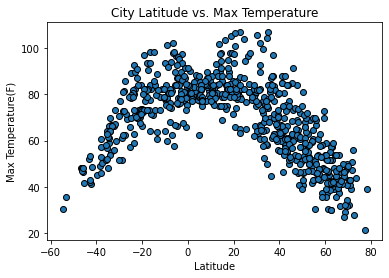

In [83]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], edgecolors = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("Lat_vs_Temp.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

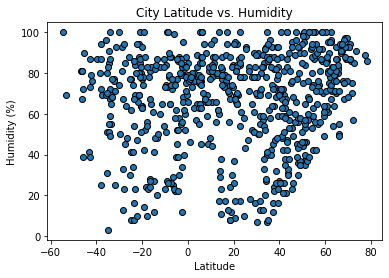

In [80]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Humidity"], edgecolors = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("Lat_vs_Humid.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

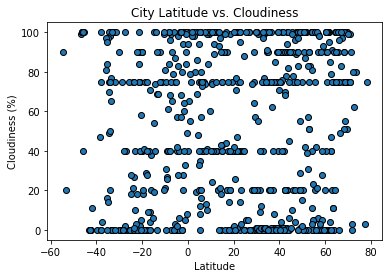

In [81]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], edgecolors = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("Lat_vs_Cloudiness.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

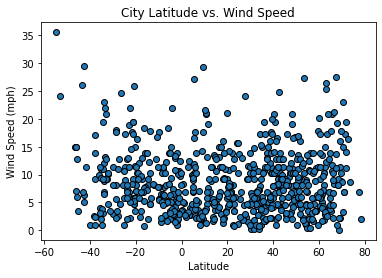

In [82]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], edgecolors = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("Lat_vs_Wind.png")

# Show plot
plt.show()

## Linear Regression

- Run linear regression on each relationship, only this time separating them into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude)
- After each pair of plots explain what the linear regression is modeling 

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6412658196428132


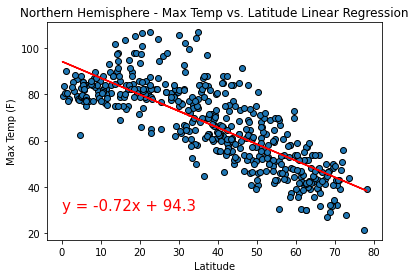

In [39]:
#importing this way down here because my api key keeps getting blocked from overuse 
from scipy.stats import linregress 
from sklearn import datasets

# Create Northern hemisphere df
north_hemi = weather_df.loc[weather_df["Lat"] >= 0]

# Add the linear regression equation and line to plot
# Print out the r-squared value along with the plot.
x_lat = north_hemi["Lat"]
y_temp = north_hemi["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_temp)
regress_values = x_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_lat, y_temp, edgecolors = "black")
plt.plot(x_lat, regress_values, "r-")
plt.annotate(line_eq, (0,30), fontsize = 15, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5455066151646675


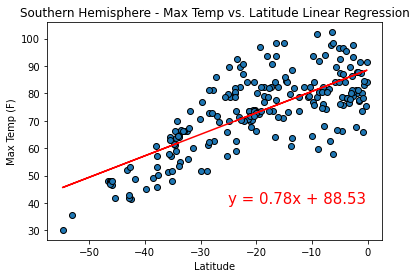

In [41]:
# Create Southern hemisphere df
south_hemi = weather_df.loc[weather_df["Lat"] < 0]

# Add the linear regression equation and line to plot
# Print out the r-squared value along with the plot.
x_lat = south_hemi["Lat"]
y_temp = south_hemi["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_temp)
regress_values = x_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_lat, y_temp, edgecolors = "black")
plt.plot(x_lat, regress_values, "r-")
plt.annotate(line_eq, (-25,40), fontsize = 15, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
plt.show()

## Northern/Southern Max Temp analysis
- Both the northern and southern plots show a steep temperature increase the closer the cities location are to the equator (0 on the latitude axis).
- The opposite temperatures are shown the further away from the equator the cities locations are. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.01750295775789456


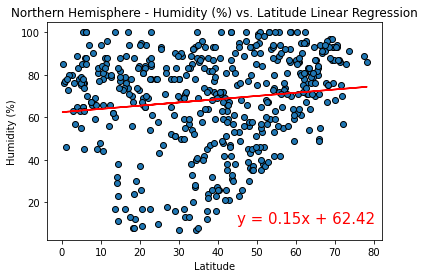

In [44]:
# Add the linear regression equation and line to plot
# Print out the r-squared value along with the plot.
x_lat = north_hemi["Lat"]
y_temp = north_hemi["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_temp)
regress_values = x_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_lat, y_temp, edgecolors = "black")
plt.plot(x_lat, regress_values, "r-")
plt.annotate(line_eq, (45,10), fontsize = 15, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0038504851629607138


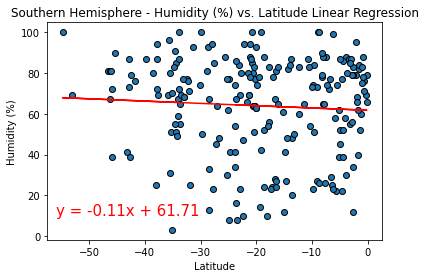

In [61]:
# Add the linear regression equation and line to plot
# Print out the r-squared value along with the plot.
x_lat = south_hemi["Lat"]
y_temp = south_hemi["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_temp)
regress_values = x_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_lat, y_temp, edgecolors = "black")
plt.plot(x_lat, regress_values, "r-")
plt.annotate(line_eq, (-56,10), fontsize = 15, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
plt.show()

## Northern/Southern Humidity analysis 
- The Humidity % on both the northern and southern hemispheres are pretty spread out and hard to read from this data. I would bet a correlation could be found in longitudes instead of latitudes. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0009215943858649807


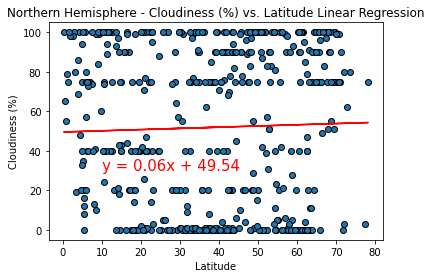

In [59]:
# Add the linear regression equation and line to plot
# Print out the r-squared value along with the plot.
x_lat = north_hemi["Lat"]
y_temp = north_hemi["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_temp)
regress_values = x_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_lat, y_temp, edgecolors = "black")
plt.plot(x_lat, regress_values, "r-")
plt.annotate(line_eq, (10,30), fontsize = 15, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.011532521253934287


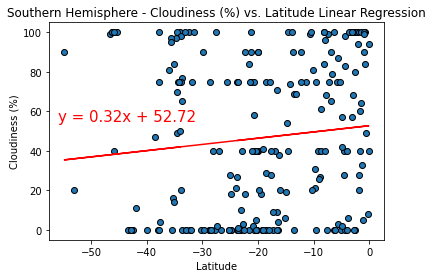

In [67]:
# Add the linear regression equation and line to plot
# Print out the r-squared value along with the plot.
x_lat = south_hemi["Lat"]
y_temp = south_hemi["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_temp)
regress_values = x_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_lat, y_temp, edgecolors = "black")
plt.plot(x_lat, regress_values, "r-")
plt.annotate(line_eq, (-56, 55), fontsize = 15, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
plt.show()

## Northern/Southern Cloudiness analysis
- Very similar to the Humidity % plots. You can practically see the longitude patterns in the visual data. This would make sense to have a correlation between clouds and humidity. However without further analysis into longitude I cannont confirm.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.011769968656312477


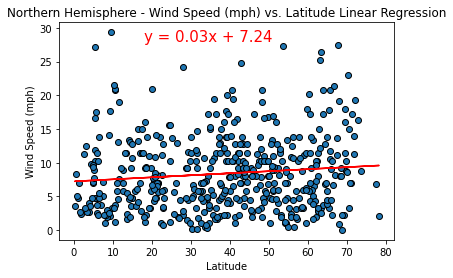

In [70]:
# Add the linear regression equation and line to plot
# Print out the r-squared value along with the plot.
x_lat = north_hemi["Lat"]
y_temp = north_hemi["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_temp)
regress_values = x_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_lat, y_temp, edgecolors = "black")
plt.plot(x_lat, regress_values, "r-")
plt.annotate(line_eq, (18, 28), fontsize = 15, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.07039701223001932


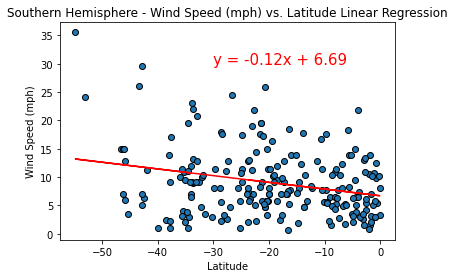

In [73]:
# Add the linear regression equation and line to plot
# Print out the r-squared value along with the plot.
x_lat = south_hemi["Lat"]
y_temp = south_hemi["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_temp)
regress_values = x_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_lat, y_temp, edgecolors = "black")
plt.plot(x_lat, regress_values, "r-")
plt.annotate(line_eq, (-30, 30), fontsize = 15, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
plt.show()

## Northern/Southern Cloudiness analysis
- The wind speed decreases the closer to the equator the cities locations are. 